In [1]:
import warnings
warnings.filterwarnings("ignore")
import env
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle_zillow as wr
import explore as ex
# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
zillow_df = pd.read_csv('zillow1.csv')

In [3]:
zillow_df.parcelid.unique().shape

(77381,)

In [4]:
wr.missing_values_table(zillow_df)

Your selected dataframe has 69 columns.
There are 52columns that have missing values.


,Missing Values,% of Total Values
buildingclasstypeid,77559,100.0
buildingclassdesc,77559,100.0
finishedsquarefeet13,77532,99.9
basementsqft,77524,99.9
storydesc,77524,99.9
storytypeid,77524,99.9
yardbuildingsqft26,77504,99.9
fireplaceflag,77402,99.8
architecturalstyledesc,77368,99.7
architecturalstyletypeid,77368,99.7


In [5]:
wr.cols_missing(zillow_df)

,num_cols_missing,num_rows,pct_cols_missing
0,23,2,11.5
1,24,13,12.0
2,25,24,12.5
3,26,65,13.0
4,27,316,13.5
5,28,457,14.0
6,29,5285,14.5
7,30,3465,15.0
8,31,9911,15.5
9,32,12606,16.0


In [6]:
zillow_df.dtypes

Unnamed: 0                        int64
id                                int64
parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  float64


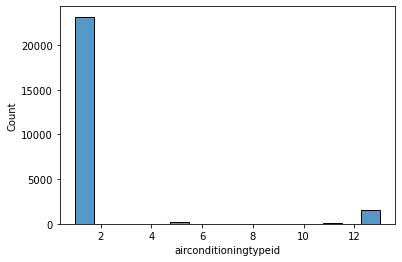

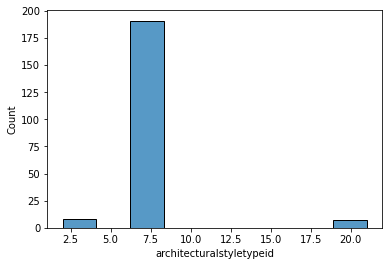

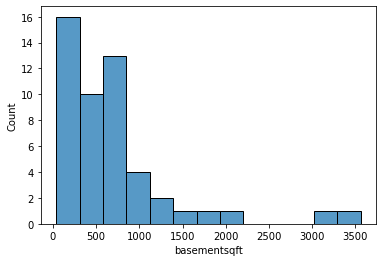

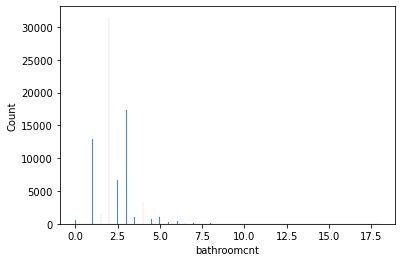

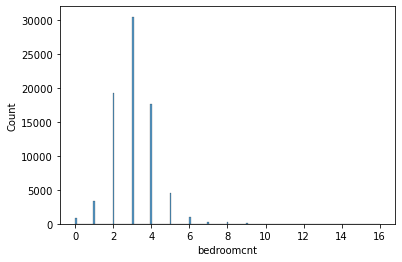

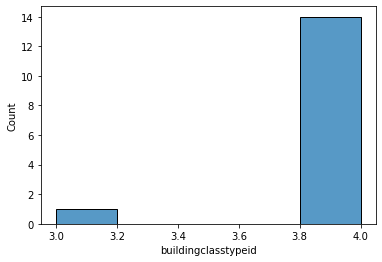

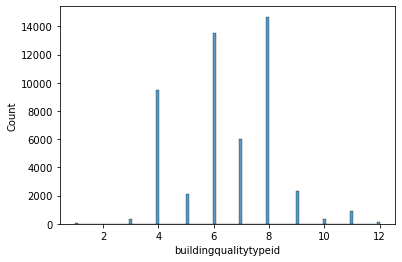

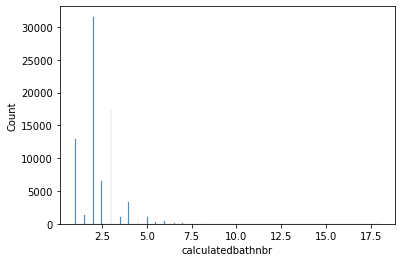

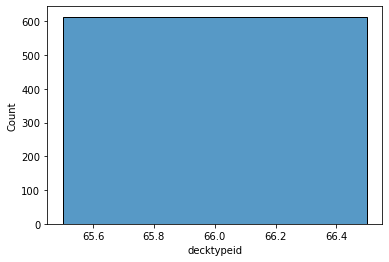

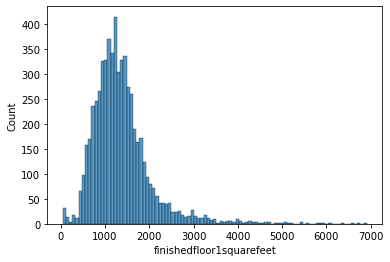

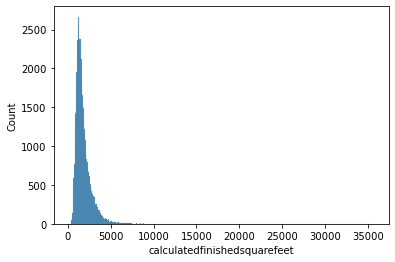

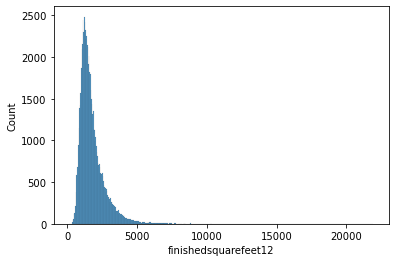

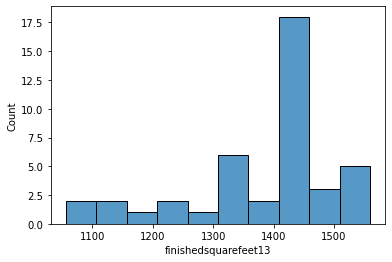

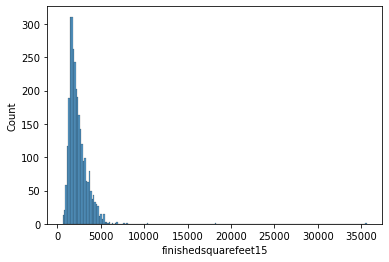

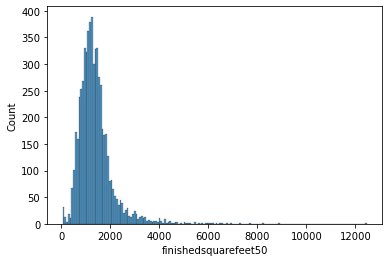

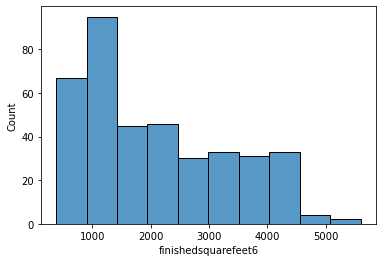

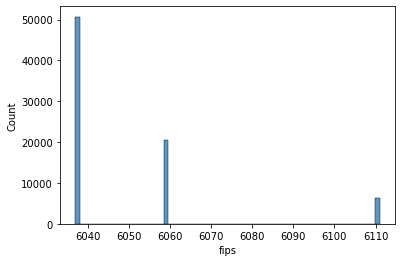

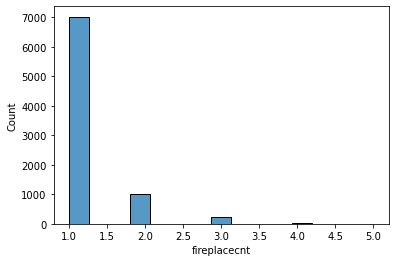

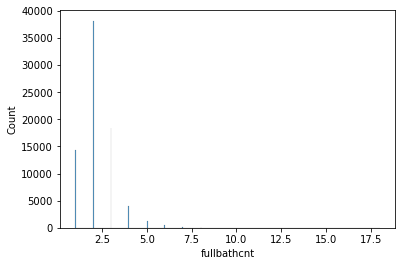

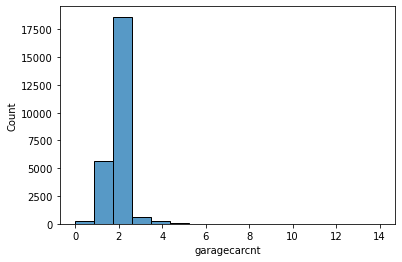

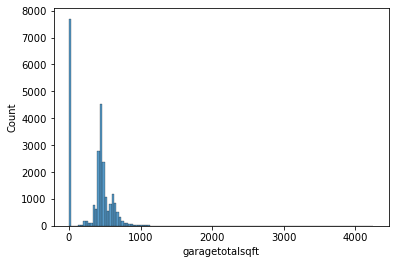

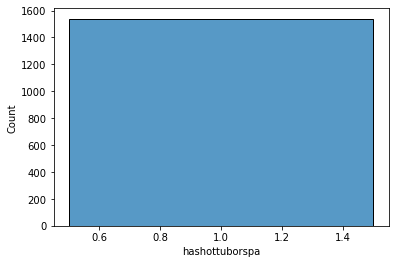

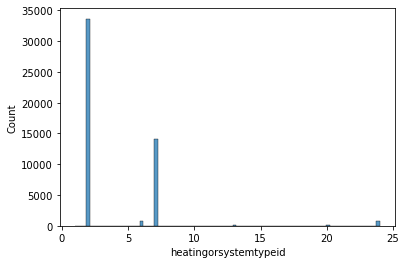

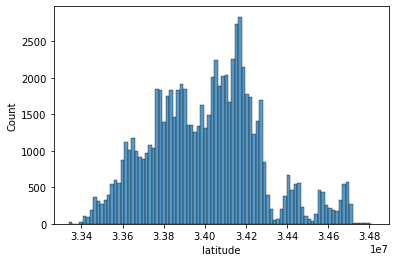

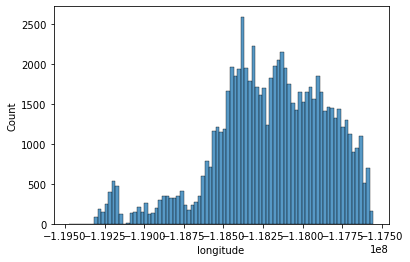

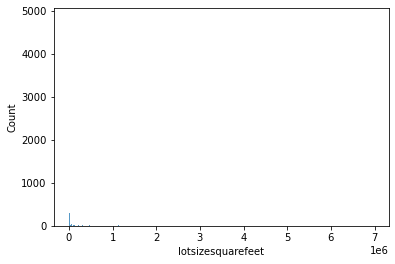

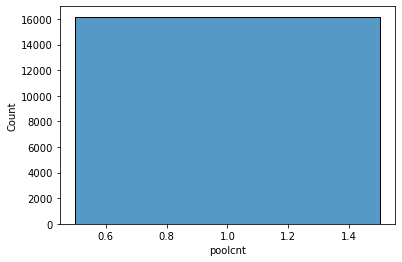

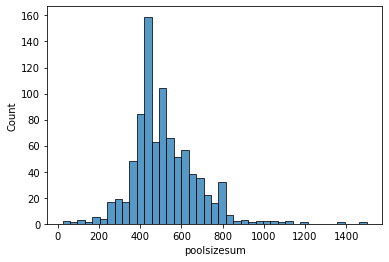

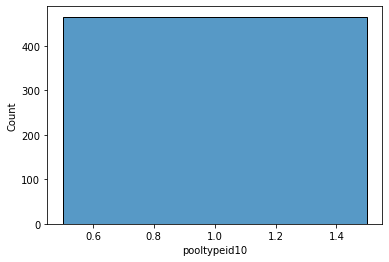

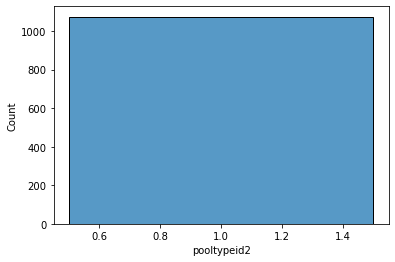

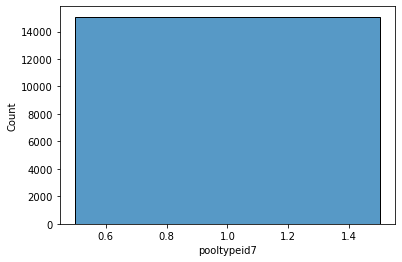

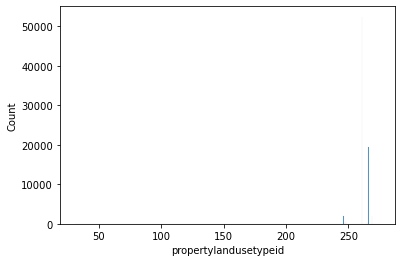

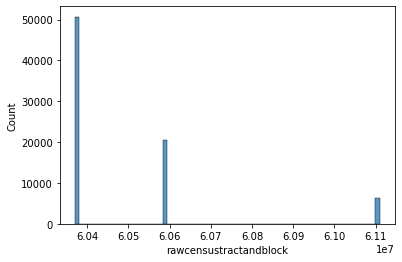

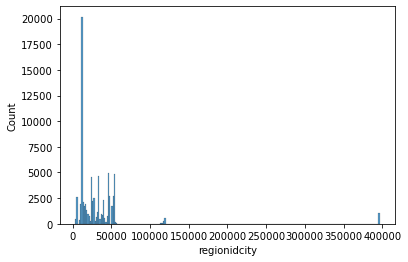

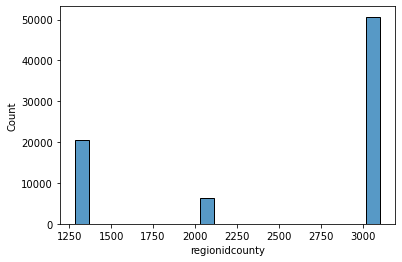

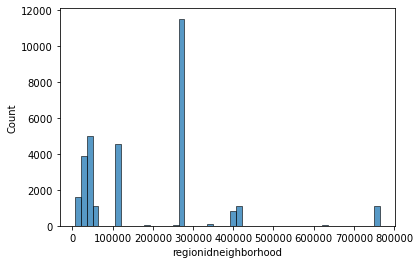

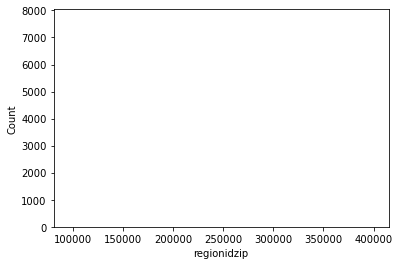

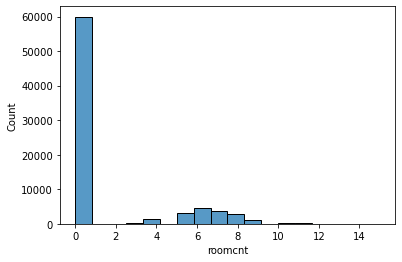

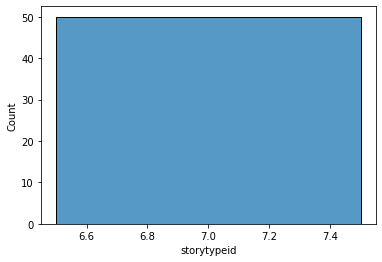

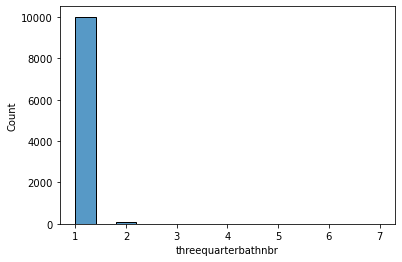

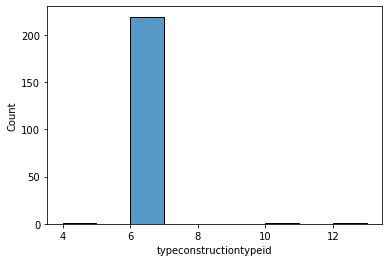

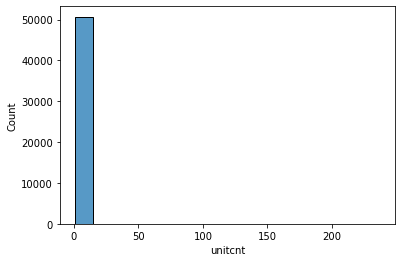

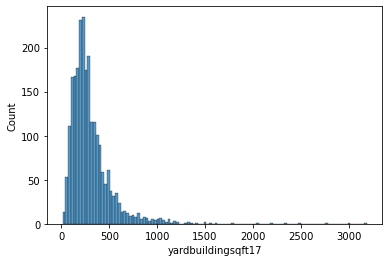

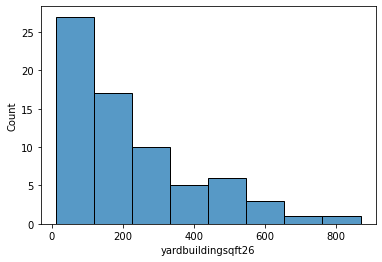

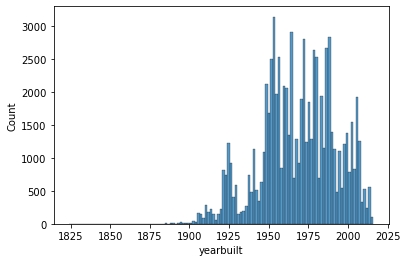

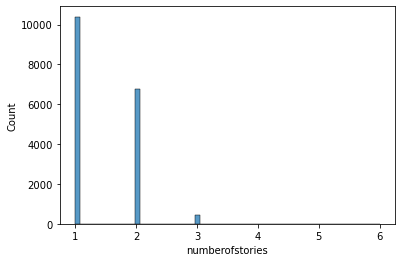

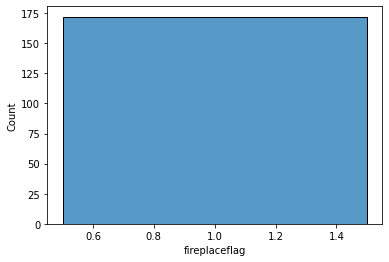

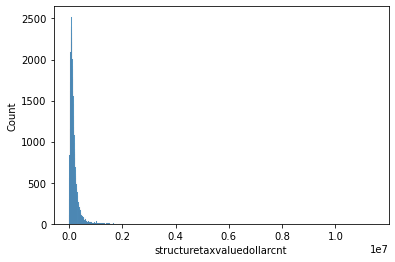

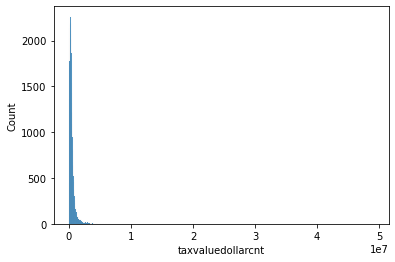

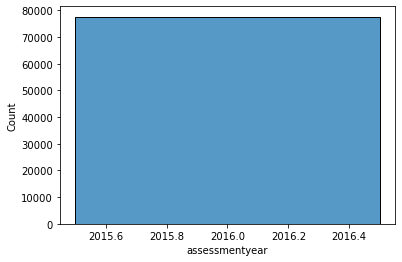

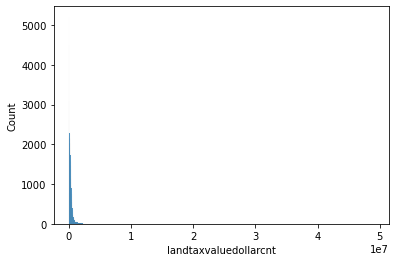

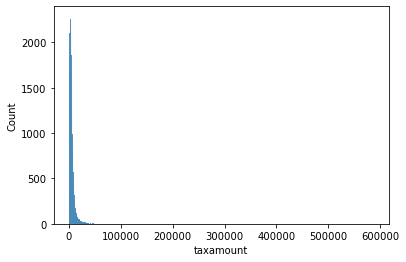

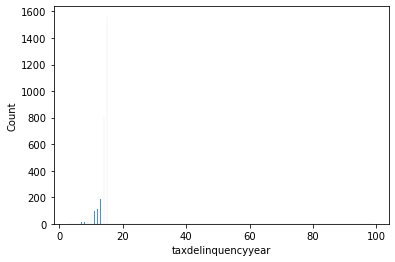

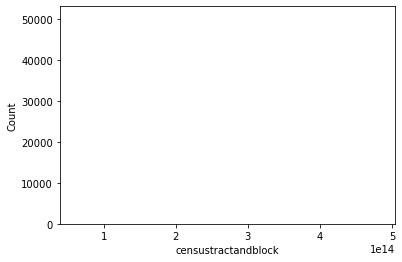

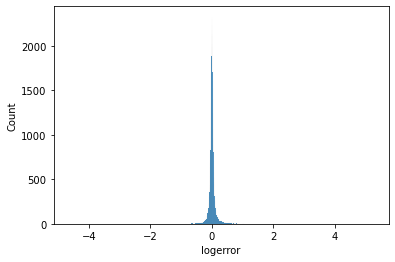

In [7]:
for x in zillow_df.select_dtypes(include = 'float64'):
    sns.histplot(data = zillow_df[x])
    plt.show()

In [8]:
zillow_df = wr.drop_nulls(zillow_df, prop_req_col = .85, prop_req_row = .65)

In [9]:
pd.DataFrame(zillow_df.columns)

,0
0,Unnamed: 0
1,id
2,parcelid
3,bathroomcnt
4,bedroomcnt
5,calculatedbathnbr
6,calculatedfinishedsquarefeet
7,finishedsquarefeet12
8,fips
9,fullbathcnt


In [10]:
zillow_df = zillow_df.drop(columns = ['finishedsquarefeet12','structuretaxvaluedollarcnt','censustractandblock','rawcensustractandblock'])

In [11]:
zillow_df.dtypes

Unnamed: 0                        int64
id                                int64
parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
logerror                        float64
transactiondate                  object


In [12]:
zillow_df[['propertylandusetypeid','propertylandusedesc']]

,propertylandusetypeid,propertylandusedesc
0,261.0,Single Family Residential
1,261.0,Single Family Residential
2,261.0,Single Family Residential
3,261.0,Single Family Residential
4,266.0,Condominium
...,...,...
77569,266.0,Condominium
77570,261.0,Single Family Residential
77571,261.0,Single Family Residential
77572,261.0,Single Family Residential


In [13]:
zillow_df.propertylandusedesc.unique()

array(['Single Family Residential', 'Condominium',
       'Duplex (2 Units, Any Combination)', 'Residential General',
       'Planned Unit Development', 'Triplex (3 Units, Any Combination)',
       'Quadruplex (4 Units, Any Combination)', 'Cluster Home',
       'Commercial/Office/Residential Mixed Used', 'Cooperative',
       'Manufactured, Modular, Prefabricated Homes', 'Mobile Home',
       'Townhouse'], dtype=object)

In [14]:
single_list = ['Single Family Residential','Manufactured, Modular, Prefabricated Homes','Mobile Home']

In [15]:
zillow_df = zillow_df[zillow_df['propertylandusedesc'].isin(single_list)]

In [16]:
zillow_df.parcelid.unique().shape

(52452,)

In [17]:
zillow_df.shape

(52571, 26)

In [18]:
zillow_df.drop_duplicates(subset = 'parcelid', inplace = True)

In [19]:
zillow_df.shape

(52452, 26)

In [20]:
zillow_df.id.unique().shape

(52452,)

In [21]:
zillow_df.columns

Index(['Unnamed: 0', 'id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'logerror', 'transactiondate', 'propertylandusedesc'],
      dtype='object')

In [22]:
zillow_num = zillow_df[['bathroomcnt','bedroomcnt','lotsizesquarefeet','taxvaluedollarcnt','taxamount']]

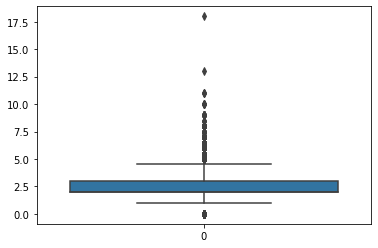

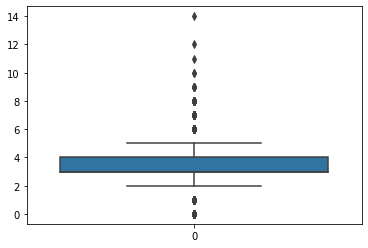

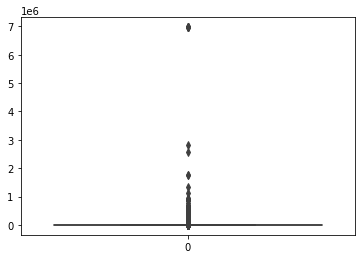

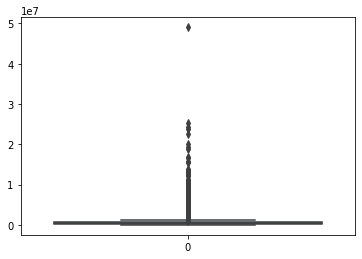

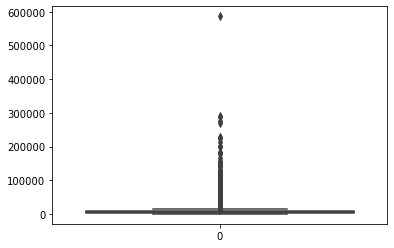

In [23]:
for x in zillow_num:
    sns.boxplot(data =  zillow_num[x])
    plt.show()

In [24]:
zillow_num = wr.remove_outliers(zillow_num,k = 1.5, col_list = ['bathroomcnt','bedroomcnt','lotsizesquarefeet','taxvaluedollarcnt','taxamount'])

In [25]:
zillow_num

,bathroomcnt,bedroomcnt,lotsizesquarefeet,taxvaluedollarcnt,taxamount
0,3.5,4.0,4506.0,1023282.0,11013.72
1,1.0,2.0,12647.0,464000.0,5672.48
2,2.0,3.0,8432.0,564778.0,6488.30
7,1.0,2.0,4214.0,218552.0,2366.08
10,3.0,4.0,10384.0,430108.0,6103.36
...,...,...,...,...,...
77567,2.0,3.0,7499.0,72026.0,1000.70
77568,2.0,4.0,4630.0,346534.0,4175.08
77571,2.0,4.0,12105.0,67205.0,1107.48
77572,1.0,3.0,5074.0,49546.0,876.43


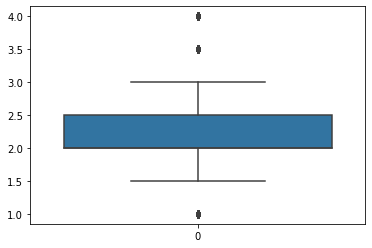

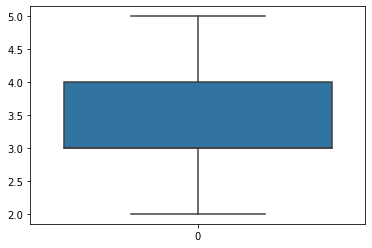

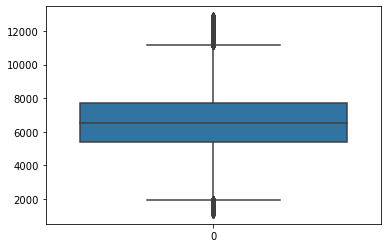

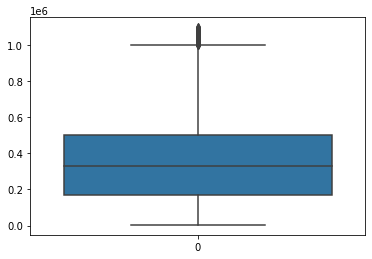

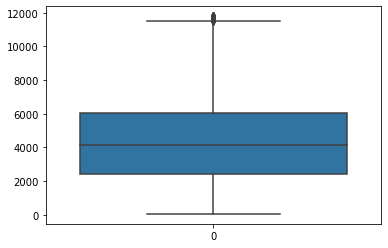

In [26]:
for x in zillow_num:
    sns.boxplot(data =  zillow_num[x])
    plt.show()

In [27]:
zillow_df = wr.remove_outliers(zillow_df, k = 1.5, col_list = ['bathroomcnt','bedroomcnt','lotsizesquarefeet','taxvaluedollarcnt','taxamount'] )

In [28]:
zillow_df

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,...,96978.0,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,6111.0,1.0,34449266.0,...,97099.0,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,...,97078.0,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential
7,7,870991,12069064,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,...,96325.0,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,...,96374.0,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77567,77567,1373391,10722691,2.0,3.0,2.0,1570.0,6037.0,2.0,34194943.0,...,96342.0,0.0,1958.0,72026.0,2016.0,25242.0,1000.70,0.081196,2017-09-19,Single Family Residential
77568,77568,2274245,12412492,2.0,4.0,2.0,1633.0,6037.0,2.0,33870815.0,...,96204.0,0.0,1962.0,346534.0,2016.0,221068.0,4175.08,0.001082,2017-09-19,Single Family Residential
77571,77571,2968375,17239384,2.0,4.0,2.0,1612.0,6111.0,2.0,34300140.0,...,97116.0,7.0,1964.0,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21,Single Family Residential
77572,77572,1843709,12773139,1.0,3.0,1.0,1032.0,6037.0,1.0,34040895.0,...,96480.0,0.0,1954.0,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21,Single Family Residential


In [29]:
wr.missing_values_table(zillow_df)

Your selected dataframe has 26 columns.
There are 6columns that have missing values.


,Missing Values,% of Total Values
regionidcity,706,1.7
yearbuilt,16,0.0
calculatedbathnbr,8,0.0
fullbathcnt,8,0.0
regionidzip,7,0.0
calculatedfinishedsquarefeet,4,0.0


Now that nulls are dropped, and outliers are cleaned, time to impute some values. I think at this point I could just delete regionidcity since I still have region id zip that I could technically use. I will impute the other values with the mean. 

In [30]:
def impute(df, strat, col_list):
    ''' take in a df, strategy, and cloumn list
        return df with listed columns imputed using input stratagy
    '''
        
    imputer = SimpleImputer(strategy=strat)  # build imputer

    df[col_list] = imputer.fit_transform(df[col_list]) # fit/transform selected column
    return df

In [31]:
impute(zillow_df, strat = 'mean', col_list = ['yearbuilt','calculatedbathnbr','fullbathcnt','regionidzip','calculatedfinishedsquarefeet'])

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,...,96978.0,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,6111.0,1.0,34449266.0,...,97099.0,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,...,97078.0,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential
7,7,870991,12069064,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,...,96325.0,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,...,96374.0,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77567,77567,1373391,10722691,2.0,3.0,2.0,1570.0,6037.0,2.0,34194943.0,...,96342.0,0.0,1958.0,72026.0,2016.0,25242.0,1000.70,0.081196,2017-09-19,Single Family Residential
77568,77568,2274245,12412492,2.0,4.0,2.0,1633.0,6037.0,2.0,33870815.0,...,96204.0,0.0,1962.0,346534.0,2016.0,221068.0,4175.08,0.001082,2017-09-19,Single Family Residential
77571,77571,2968375,17239384,2.0,4.0,2.0,1612.0,6111.0,2.0,34300140.0,...,97116.0,7.0,1964.0,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21,Single Family Residential
77572,77572,1843709,12773139,1.0,3.0,1.0,1032.0,6037.0,1.0,34040895.0,...,96480.0,0.0,1954.0,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21,Single Family Residential


In [32]:
zillow_df = zillow_df.drop(columns = 'regionidcity')

In [33]:
zillow_df

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,...,96978.0,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,6111.0,1.0,34449266.0,...,97099.0,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,...,97078.0,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential
7,7,870991,12069064,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,...,96325.0,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,...,96374.0,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77567,77567,1373391,10722691,2.0,3.0,2.0,1570.0,6037.0,2.0,34194943.0,...,96342.0,0.0,1958.0,72026.0,2016.0,25242.0,1000.70,0.081196,2017-09-19,Single Family Residential
77568,77568,2274245,12412492,2.0,4.0,2.0,1633.0,6037.0,2.0,33870815.0,...,96204.0,0.0,1962.0,346534.0,2016.0,221068.0,4175.08,0.001082,2017-09-19,Single Family Residential
77571,77571,2968375,17239384,2.0,4.0,2.0,1612.0,6111.0,2.0,34300140.0,...,97116.0,7.0,1964.0,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21,Single Family Residential
77572,77572,1843709,12773139,1.0,3.0,1.0,1032.0,6037.0,1.0,34040895.0,...,96480.0,0.0,1954.0,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21,Single Family Residential


In [34]:
zillow_df['county'] = zillow_df['fips'].replace(to_replace = [6037, 6059, 6111], value = ['LA','Orange','Ventura'])

In [35]:
zillow_df = zillow_df.drop(columns = 'fips')

In [36]:
zillow_df.head()

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fullbathcnt,latitude,longitude,...,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,3.0,33634931.0,-117869207.0,...,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential,Orange
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,1.0,34449266.0,-119281531.0,...,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential,Ventura
2,2,11677,14186244,2.0,3.0,2.0,1243.0,2.0,33886168.0,-117823170.0,...,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential,Orange
7,7,870991,12069064,1.0,2.0,1.0,738.0,1.0,34149214.0,-118239357.0,...,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential,LA
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,3.0,34434971.0,-118464390.0,...,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential,LA


In [37]:
zillow_df.columns

Index(['Unnamed: 0', 'id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'logerror',
       'transactiondate', 'propertylandusedesc', 'county'],
      dtype='object')

In [38]:
zillow_df = zillow_df.drop(columns = ['propertylandusetypeid','propertycountylandusecode','roomcnt','transactiondate','regionidcounty'])

In [39]:
zillow_df.shape

(41057, 20)

In [2]:
clean_df = wr.wrangle_zillow()

In [3]:
clean_df.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'lotsizesquarefeet', 'regionidzip', 'yearbuilt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'propertylandusedesc',
       'county'],
      dtype='object')

In [4]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44039.0,1.496087e+06,8.589188e+05,3.550000e+02,7.582770e+05,1.497808e+06,2.240202e+06,2.982167e+06
parcelid,44039.0,1.297207e+07,2.150385e+06,1.071186e+07,1.151226e+07,1.261842e+07,1.410872e+07,1.629608e+08
bathroomcnt,44039.0,2.085561e+00,7.363994e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.500000e+00,4.000000e+00
bedroomcnt,44039.0,3.199550e+00,8.478721e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
calculatedfinishedsquarefeet,44039.0,1.689670e+03,6.374105e+02,1.520000e+02,1.227000e+03,1.555000e+03,2.036000e+03,5.493000e+03
latitude,44039.0,3.402260e+07,2.701766e+05,3.334085e+07,3.382998e+07,3.400756e+07,3.419034e+07,3.472023e+07
longitude,44039.0,-1.181883e+08,3.532717e+05,-1.194753e+08,-1.183809e+08,-1.181401e+08,-1.179355e+08,-1.175546e+08
lotsizesquarefeet,44039.0,7.032648e+03,2.869854e+03,2.360000e+02,5.434000e+03,6.600000e+03,7.976000e+03,1.993300e+04
regionidzip,44039.0,9.658975e+04,2.536313e+03,9.598200e+04,9.621200e+04,9.641500e+04,9.699600e+04,3.996750e+05
yearbuilt,44015.0,1.961509e+03,2.176626e+01,1.878000e+03,1.950000e+03,1.959000e+03,1.976000e+03,2.016000e+03


In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44039 entries, 0 to 77573
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            44039 non-null  int64  
 1   parcelid                      44039 non-null  int64  
 2   bathroomcnt                   44039 non-null  float64
 3   bedroomcnt                    44039 non-null  float64
 4   calculatedfinishedsquarefeet  44039 non-null  float64
 5   latitude                      44039 non-null  float64
 6   longitude                     44039 non-null  float64
 7   lotsizesquarefeet             44039 non-null  float64
 8   regionidzip                   44039 non-null  float64
 9   yearbuilt                     44015 non-null  float64
 10  taxvaluedollarcnt             44039 non-null  float64
 11  landtaxvaluedollarcnt         44039 non-null  float64
 12  taxamount                     44039 non-null  float64
 13  l

In [6]:
train, validate, test = wr.train_validate_test_split(clean_df)

In [7]:
train

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,regionidzip,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county
66141,1475377,13977911,2.5,2.0,1738.0,33683792.0,-118003519.0,2086.0,96966.0,2002.0,802047.0,607639.0,8997.18,0.012019,Single Family Residential,Orange
52955,2856452,12631010,2.0,3.0,1449.0,33797505.0,-118266036.0,5171.0,96228.0,1958.0,270562.0,201596.0,3432.97,0.079414,Single Family Residential,LA
58700,1583746,11091389,3.0,4.0,2184.0,34246628.0,-118544155.0,7460.0,96354.0,1963.0,410556.0,235603.0,5088.77,0.029079,Single Family Residential,LA
71744,1755016,12991299,2.0,3.0,1124.0,34063430.0,-117976280.0,5836.0,96490.0,1955.0,263032.0,157331.0,3475.87,0.022649,Single Family Residential,LA
58380,2632563,12616571,2.0,3.0,1286.0,33849772.0,-118252964.0,4626.0,96230.0,1970.0,326748.0,221638.0,4518.19,0.006161,Single Family Residential,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1518169,14202632,3.0,5.0,2834.0,33880952.0,-117703856.0,8800.0,97079.0,1990.0,590931.0,300265.0,7061.22,-0.011512,Single Family Residential,Orange
23319,2243609,12190057,1.0,2.0,736.0,33975813.0,-118284277.0,5400.0,96025.0,1918.0,123809.0,88045.0,1626.00,-0.059803,Single Family Residential,LA
18509,209760,17271049,2.5,4.0,2614.0,34172606.0,-118948759.0,7254.0,96351.0,1979.0,698056.0,349028.0,7791.36,0.014498,Single Family Residential,Ventura
19779,2369101,14484432,3.0,4.0,3046.0,33622587.0,-117620226.0,5000.0,96993.0,1992.0,876000.0,535241.0,11098.68,-0.078957,Single Family Residential,Orange


### Exploration hypotheses:
- county influences log error
- tax value influences log error
- year buit influences log error
- california tax rate is set at 1%, but I know from previous work there are some outliers in tax rate. Perhaps look at those?

In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44039 entries, 0 to 77573
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            44039 non-null  int64  
 1   parcelid                      44039 non-null  int64  
 2   bathroomcnt                   44039 non-null  float64
 3   bedroomcnt                    44039 non-null  float64
 4   calculatedfinishedsquarefeet  44039 non-null  float64
 5   latitude                      44039 non-null  float64
 6   longitude                     44039 non-null  float64
 7   lotsizesquarefeet             44039 non-null  float64
 8   regionidzip                   44039 non-null  float64
 9   yearbuilt                     44015 non-null  float64
 10  taxvaluedollarcnt             44039 non-null  float64
 11  landtaxvaluedollarcnt         44039 non-null  float64
 12  taxamount                     44039 non-null  float64
 13  l